In [1]:
# reload
#%reset
%load_ext autoreload
%autoreload 2 

import warnings
import logging
import os

# DEBUG MODE
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings('ignore')
logging.getLogger('tensorflow').setLevel(logging.FATAL)
    
from s3l_training import s3l_training

Run with random seed:  561
GPU is available.
1
True
12.1
Concatenating runs:  range(1, 11)
Time to read csv file for run:  3.547776937484741
Loaded run 1
Time to read csv file for run:  3.4172048568725586
Loaded run 2
Time to read csv file for run:  3.3367464542388916
Loaded run 3
Time to read csv file for run:  3.3362069129943848
Loaded run 4
Time to read csv file for run:  3.342918634414673
Loaded run 5
Time to read csv file for run:  3.138361930847168
Loaded run 6
Time to read csv file for run:  3.3358371257781982
Loaded run 7
Time to read csv file for run:  3.215341329574585
Loaded run 8
Time to read csv file for run:  3.3932785987854004
Loaded run 9
Time to read csv file for run:  3.3599252700805664
Loaded run 10
pretrain_data, before removing rows that dont have traffic  (1799100, 102)
pretrain_data, after removing rows that dont have traffic  (102769, 102)
X_pretrain  (102448, 92)


Seed set to 42


HYPERPARAMETERS:  {'loss_fn': 'MSELoss', 'metric': 'r2_score', 'hidden_dim': 200, 'max_epochs': 100, 'batch_size': 128, 'optim_hparams': {'lr': 0.0001, 'weight_decay': 5e-05}, 'encoder_depth': 4, 'head_depth': 2, 'noise_type': 'Swap', 'mask_ratio': 0.3, 'tau': 1.0, 'use_cosine_similarity': True, 'use_contrastive': True, 'use_distance': True, 'n_subsets': 4, 'overlap_ratio': 0.75}
92 4 0.75 23
23 17


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


refresh rate:  10



  | Name          | Type      | Params | Mode 
----------------------------------------------------
0 | task_loss_fn  | MSELoss   | 0      | train
1 | joint_loss_fn | JointLoss | 0      | train
2 | model         | SubTab    | 207 K  | train
----------------------------------------------------
207 K     Trainable params
0         Non-trainable params
207 K     Total params
0.832     Total estimated model params size (MB)


Epoch 99: 100%|█████████████████████████████████████████████████████████| 725/725 [00:25<00:00, 28.03it/s, train_loss=5.050, val_loss=5.010]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|█████████████████████████████████████████████████████████| 725/725 [00:25<00:00, 28.02it/s, train_loss=5.050, val_loss=5.010]


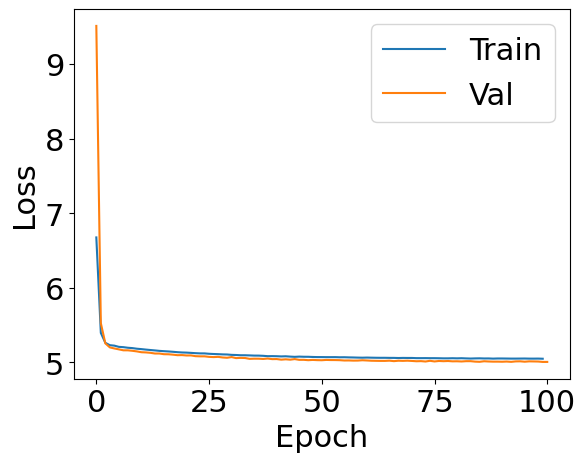

DONE SAVING PRETRAINED MODEL
   | Name                                             | Type             | Params | Mode 
-----------------------------------------------------------------------------------------------
0  | task_loss_fn                                     | MSELoss          | 0      | train
1  | joint_loss_fn                                    | JointLoss        | 0      | train
2  | joint_loss_fn.mse_loss                           | MSELoss          | 0      | train
3  | joint_loss_fn.criterion                          | CrossEntropyLoss | 0      | train
4  | model                                            | SubTab           | 207 K  | train
5  | model._SubTab__auto_encoder                      | AutoEncoder      | 107 K  | train
6  | model._SubTab__auto_encoder.encoder              | ShallowEncoder   | 8.2 K  | train
7  | model._SubTab__auto_encoder.encoder.net          | Sequential       | 8.2 K  | train
8  | model._SubTab__auto_encoder.encoder.net.0        | Linear   

In [2]:
s3l_training(pretrain=True, # if True First Phase training
             use_pretrained_model=False, # if True Second Phase learning
             pt_type='subtab', 
             pt_folder='FP4')